Data Science Work For Space Apps Challenge 

Goal: Develop a machine learning (ML) algorithm or neural network pipeline for the DSCOVR spacecraft's FC instrument to track and follow the changes in the peak solar wind speed (to provide early warning signs of a Carrington-like event)

Event Details: https://2022.spaceappschallenge.org/challenges/2022-challenges/carrington-event/details

In [2]:
import os
library_directory = '/home/colin/hackathons/spaceapps/cdf38_1-dist/lib'
os.environ["CDF_LIB"] = library_directory
from spacepy import pycdf

Step 1: Investigate Data

Provided Data:
- DSCOVER Magnetic Field Data Sets
- Wind Mission's Magnetic Field Data
- Wind Mission's Ion Parameters

Ground Truth:
- Wind's Magnetic Field Data
- Wind's ION Parameter Data

Considerations:
- Time period should be between a few months and a year (long enough to have complete representation of plasma conditions, short enough that instrument degredation does not become too noticable)
- Data discrepencies between Wind and DSCOVR should be reconciled; remove any major discrepencies

Locations: 
- (wind magnetic) https://cdaweb.gsfc.nasa.gov/pub/data/wind/mfi/mfi_h2/2022/
- (wind ion) https://cdaweb.gsfc.nasa.gov/pub/data/wind/swe/swe_h1/2022/ 
- (dscover magnetic) https://cdaweb.gsfc.nasa.gov/pub/data/dscovr/h0/mag/2022/

Download Wind (magnetic field) Data:

In [191]:
import wget
url = 'https://cdaweb.gsfc.nasa.gov/pub/data/wind/mfi/mfi_h2/2022/wi_h2_mfi_20220101_v04.cdf'
filename = wget.download(url)	
# TO DO:
#   add names of all files to download to array 
#   download all files

In [60]:
cdf_wind = pycdf.CDF('datasets/wi_h2_mfi_20220101_v04.cdf')
print('These are the variables within this file:\n')
print(cdf_wind)

These are the variables within this file:

AMPL1_I: CDF_REAL4 [1440, 3, 8]
AMPL1_O: CDF_REAL4 [1440, 3, 8]
BF1: CDF_REAL4 [925803, 1]
BGSE: CDF_REAL4 [925803, 3]
BGSM: CDF_REAL4 [925803, 3]
Epoch: CDF_EPOCH [925803, 1]
Epoch1: CDF_EPOCH [1440, 1]
FLAG1_I: CDF_INT4 [1440, 1]
FLAG1_O: CDF_INT4 [1440, 1]
MAG_MODE: CDF_INT4 [925803, 1]
NUM1_PTS_I: CDF_INT4 [1440, 1]
NUM1_PTS_O: CDF_INT4 [1440, 1]
ORTH1_I: CDF_REAL8 [1440, 3, 3]
ORTH1_O: CDF_REAL8 [1440, 3, 3]
PAYLD1_I: CDF_REAL8 [1440, 3, 3]
PAYLD1_O: CDF_REAL8 [1440, 3, 3]
RANGE: CDF_INT4 [925803, 1]
SENS1_I: CDF_REAL4 [1440, 3, 8]
SENS1_O: CDF_REAL4 [1440, 3, 8]
SPC_MODE: CDF_INT4 [925803, 1]
Time1_PB5: CDF_INT4 [1440, 3]
Time_PB5: CDF_INT4 [925803, 3]
ZERO1_I: CDF_REAL4 [1440, 3, 8]
ZERO1_O: CDF_REAL4 [1440, 3, 8]
cartesian: CDF_CHAR*11 [3] NRV
format_time: CDF_CHAR*2 [3] NRV
label_bgse: CDF_CHAR*8 [3] NRV
label_bgsm: CDF_CHAR*8 [3] NRV
label_time: CDF_CHAR*27 [3] NRV
unit_time: CDF_CHAR*4 [3] NRV


In [4]:
print('This is the global metadata record of the file:\n')
print(cdf_wind.attrs)

This is the global metadata record of the file:

ADID_ref: NSSD0141 [CDF_CHAR]
Attitude_file: wi_at_pre_20211231_v02.cdf [CDF_CHAR]
               wi_at_pre_20220101_v02.cdf [CDF_CHAR]
               wi_at_pre_20220102_v02.cdf [CDF_CHAR]
Data_type: H2>High-resolution Definitive Data [CDF_CHAR]
Data_version: 04 [CDF_CHAR]
Descriptor: MFI>Magnetic Fields Investigation [CDF_CHAR]
Discipline: Space Physics>Heliospheric Science [CDF_CHAR]
HKlvl_0_file: wi_lz_scr_20211231_v01.dat [CDF_CHAR]
              wi_lz_scr_20220101_v01.dat [CDF_CHAR]
              wi_lz_scr_20220102_v01.dat [CDF_CHAR]
Instrument_type: Magnetic Fields (space) [CDF_CHAR]
Level_0_file: wi_lz_mfi_20211231_v01.dat [CDF_CHAR]
              wi_lz_mfi_20220101_v01.dat [CDF_CHAR]
              wi_lz_mfi_20220102_v01.dat [CDF_CHAR]
Logical_file_id: wi_h2_mfi_00000000_v00 [CDF_CHAR]
Logical_source: wi_h2_mfi [CDF_CHAR]
Logical_source_description: Wind Magnetic Fields Investigation, High-resolution Definitive Data [CDF_CHAR]
MOD

[[datetime.datetime(2022, 1, 1, 0, 0, 0, 78000)]
 [datetime.datetime(2022, 1, 1, 0, 0, 0, 170000)]
 [datetime.datetime(2022, 1, 1, 0, 0, 0, 262000)]
 ...
 [datetime.datetime(2022, 1, 1, 23, 59, 59, 754000)]
 [datetime.datetime(2022, 1, 1, 23, 59, 59, 846000)]
 [datetime.datetime(2022, 1, 1, 23, 59, 59, 938000)]]
(925803, 3)


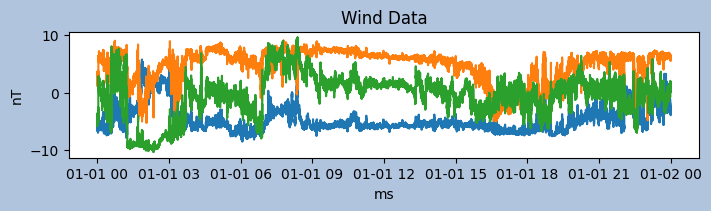

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

x = cdf_wind['Epoch'][...]
print(x)
y = cdf_wind['BGSE'][...]
y_df = pd.DataFrame(y)
print(y_df.shape)
y_df_filtered = y_df[(y_df > -2147483648)] 

fig, ax = plt.subplots(figsize=(7,2), constrained_layout=True)
ax.plot(x, y_df_filtered)
ax.set_xlabel('ms')
ax.set_ylabel('nT')
plt.title('Wind Data')
fig.set_facecolor('lightsteelblue')

Download DSCOVR Data

In [195]:
url = 'https://cdaweb.gsfc.nasa.gov/pub/data/dscovr/h0/mag/2022/dscovr_h0_mag_20220101_v01.cdf'
filename = wget.download(url)	

In [61]:
cdf_dscovr = pycdf.CDF('datasets/dscovr_h0_mag_20220101_v01.cdf')
print('These are the variables within this file:\n')
print(cdf_dscovr)

These are the variables within this file:

B1F1: CDF_REAL4 [86400]
B1GSE: CDF_REAL4 [86400, 3]
B1RTN: CDF_REAL4 [86400, 3]
B1SDF1: CDF_REAL4 [86400]
B1SDGSE: CDF_REAL4 [86400, 3]
B1SDRTN: CDF_REAL4 [86400, 3]
Epoch1: CDF_EPOCH [86400]
FLAG1: CDF_INT2 [86400]
NUM1_PTS: CDF_INT4 [86400]
RANGE1: CDF_INT2 [86400]
SENS: CDF_REAL4 [3, 8] NRV
Time1_PB5: CDF_INT4 [86400, 3]
ZERO: CDF_REAL4 [3, 8] NRV
format_time: CDF_CHAR*2 [3] NRV
label_bgse: CDF_CHAR*8 [3] NRV
label_brtn: CDF_CHAR*8 [3] NRV
label_bsdgse: CDF_CHAR*14 [3] NRV
label_bsdrtn: CDF_CHAR*14 [3] NRV
label_time: CDF_CHAR*27 [3] NRV
unit_time: CDF_CHAR*4 [3] NRV


In [7]:
print(cdf_dscovr['B1F1'].attrs)
print("\n")
print(cdf_dscovr['B1GSE'].attrs)
print("\n")
print(cdf_dscovr['B1RTN'].attrs)
print("\n")
print(cdf_dscovr['Time1_PB5'].attrs)

CATDESC: Magnetic field magnitude (1 sec) [CDF_CHAR]
DEPEND_0: Epoch1 [CDF_CHAR]
DISPLAY_TYPE: time_series [CDF_CHAR]
FIELDNAM: Magnetic field magnitude (1 sec) [CDF_CHAR]
FILLVAL: -1e+31 [CDF_FLOAT]
FORMAT: E13.6 [CDF_CHAR]
LABLAXIS: B [CDF_CHAR]
MONOTON: FALSE [CDF_CHAR]
SCALEMAX: 10.33799 [CDF_FLOAT]
SCALEMIN: 6.200893 [CDF_FLOAT]
SCALETYP: LINEAR [CDF_CHAR]
TIME_RES: 1 sec [CDF_CHAR]
UNITS: nT [CDF_CHAR]
VALIDMAX: 65534.0 [CDF_FLOAT]
VALIDMIN: 0.0 [CDF_FLOAT]
VAR_NOTES: Average of the magnitude (F1) [CDF_CHAR]
VAR_TYPE: data [CDF_CHAR]


CATDESC: Magnetic field vector in GSE cartesian coordinates (1 sec) [CDF_CHAR]
DEPEND_0: Epoch1 [CDF_CHAR]
DISPLAY_TYPE: time_series [CDF_CHAR]
FIELDNAM: Magnetic field vector in GSE cartesian coordinates (1 sec) [CDF_CHAR]
FILLVAL: -1e+31 [CDF_FLOAT]
FORMAT: E13.6 [CDF_CHAR]
LABL_PTR_1: label_bgse [CDF_CHAR]
MONOTON: FALSE [CDF_CHAR]
SCALEMAX: [3.208676 9.184736 9.146015] [CDF_FLOAT]
SCALEMIN: [-9.118552  -6.4383945 -9.388936 ] [CDF_FLOAT]
SCALETY

In [8]:
print('This is the global metadata record of the file:\n')
print(cdf_dscovr.attrs)

This is the global metadata record of the file:

Data_type: H0>1-sec Definitive Data [CDF_CHAR]
Data_version: 1 [CDF_CHAR]
Descriptor: MAG>Fluxgate Magnetometer [CDF_CHAR]
Discipline: Space Physics>Heliospheric Science [CDF_CHAR]
File_naming_convention: source_datatype_descriptor_yyyyMMdd [CDF_CHAR]
Instrument_type: Magnetic Fields (space) [CDF_CHAR]
Logical_file_id: dscovr_h0_mag_20220101_v01 [CDF_CHAR]
Logical_source: dscovr_h0_mag [CDF_CHAR]
Logical_source_description: DSCOVR Fluxgate Magnetometer 1-sec Definitive Data [CDF_CHAR]
MODS: 12/01/2016 Initial release [CDF_CHAR]
Mission_group: DSCOVR [CDF_CHAR]
PI_affiliation: UMBC, NASA/GSFC [CDF_CHAR]
PI_name: A. Koval [CDF_CHAR]
Processing_date: Mon Feb 28 20:19:02 2022 UTC [CDF_CHAR]
Project: DSCOVR>Deep Space Climate Observatory [CDF_CHAR]
Software_version: V01.00 [CDF_CHAR]
Source_name: DSCOVR>Deep Space Climate Observatory [CDF_CHAR]
TEXT: DSCOVR Fluxgate Magnetometer 1-sec Definitive Data                               [CDF_CHAR]
T

[datetime.datetime(2022, 1, 1, 0, 0, 0, 500000)
 datetime.datetime(2022, 1, 1, 0, 0, 1, 500000)
 datetime.datetime(2022, 1, 1, 0, 0, 2, 500000) ...
 datetime.datetime(2022, 1, 1, 23, 59, 57, 500000)
 datetime.datetime(2022, 1, 1, 23, 59, 58, 500000)
 datetime.datetime(2022, 1, 1, 23, 59, 59, 500000)]
(86400, 3)


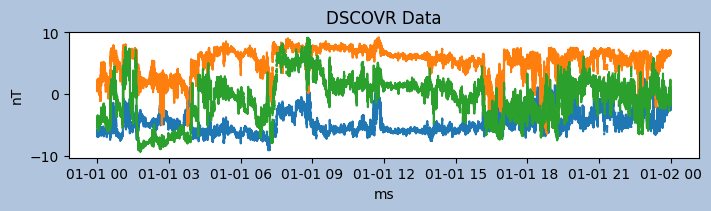

In [12]:
x = cdf_dscovr['Epoch1'][...]
print(x)
y = cdf_dscovr['B1GSE'][...]
y_df = pd.DataFrame(y)
print(y_df.shape)
y_df_filtered = y_df[(y_df > -2147483648)] 

fig, ax = plt.subplots(figsize=(7,2), constrained_layout=True)
ax.plot(x, y_df_filtered)
ax.set_xlabel('ms')
ax.set_ylabel('nT')
plt.title('DSCOVR Data')
fig.set_facecolor('lightsteelblue')


Step 2: Derive Dynamic Time Warping (DTW) mappings between the two data sets

Measurement: Pτ( BW(D(t)), BD(t) ) where...
- t is on the order of hours to days
- Pτ is a non-linear correlation measurement

Example: https://arxiv.org/abs/2109.03742

Plot One Hour of Wind and DSCOVR Data

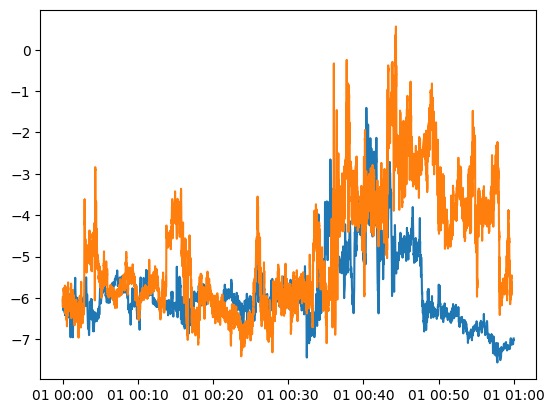

In [9]:
q = cdf_dscovr['B1GSE'][...]
x1 = cdf_dscovr['Epoch1'][...][:3600]
query = pd.DataFrame(q)

plt.plot(x1,query[0][:3600])

t = cdf_wind['BGSE'][...]
template = pd.DataFrame(t)
template.head()
x2 = cdf_wind['Epoch'][...][:38576]

plt.plot(x2, template[0][:38576])
# plt.close()

Downsample the Wind Data 

Wind - 925803 data points (per day)
DSCOVER - 86400 data points (per day) 
downsample wind by ~ 11

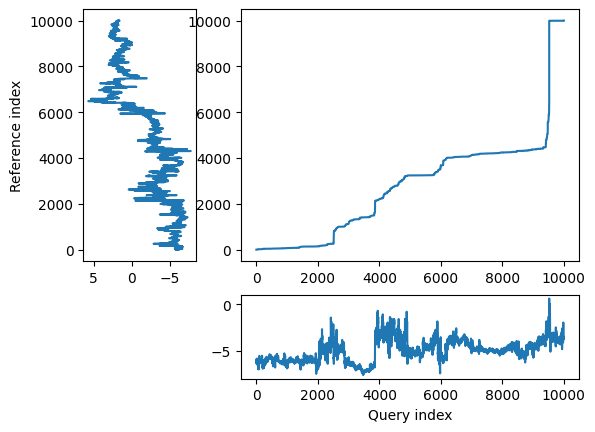

0.5021033221037942


In [16]:
from dtw import *
import matplotlib.pyplot as plt

q = cdf_dscovr['B1GSE'][...]
query = pd.DataFrame(q)

t = cdf_wind['BGSE'][...]
template = pd.DataFrame(t)
template = template[0].iloc[::11]
template = template.reset_index(drop=True)

alignment1 = dtw(query[0].iloc[:10000], template.iloc[:10000], keep_internals=True)

alignment1.plot(type="threeway")
plt.show()
print(alignment1.normalizedDistance)

DTW w/ a symmetric step pattern (not reasonable)

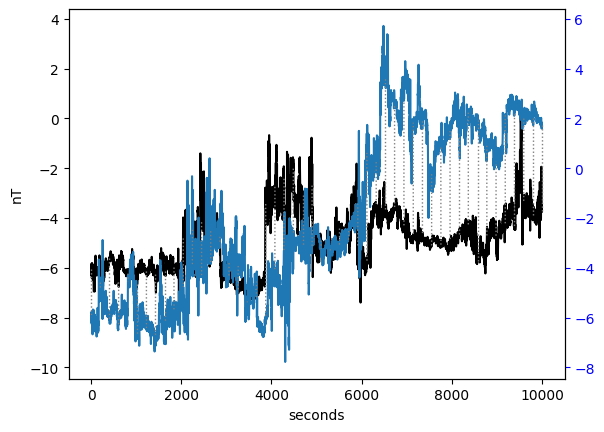

In [18]:
alignment2 = dtw(query[0][:10000], template[:10000], keep_internals=True, window_type="sakoechiba", window_args={'window_size':2},
    step_pattern=symmetricP1).plot(type="twoway",offset=-2, xlab="seconds", ylab='nT')
plt.show()

DTW w/ Rabiner Juang step pattern (more reasonable) for each component of the Magnetic field vector (which is mapped to GSE cartesian coordinates)

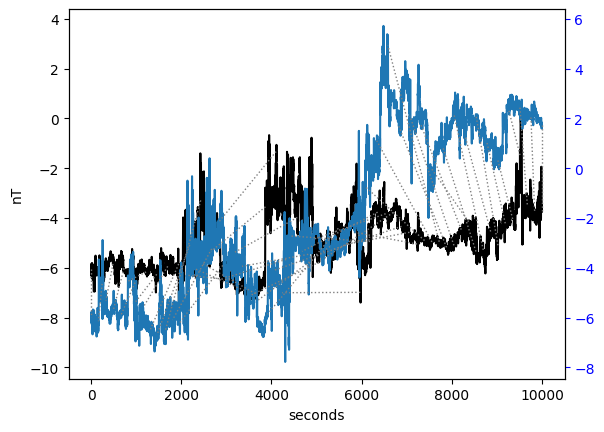

In [19]:
alignment3 = dtw(query[0].iloc[:10000], template.iloc[:10000], keep_internals=True, 
    step_pattern=rabinerJuangStepPattern(6, "c")).plot(type="twoway",offset=-2, xlab="seconds", ylab='nT')
plt.show()

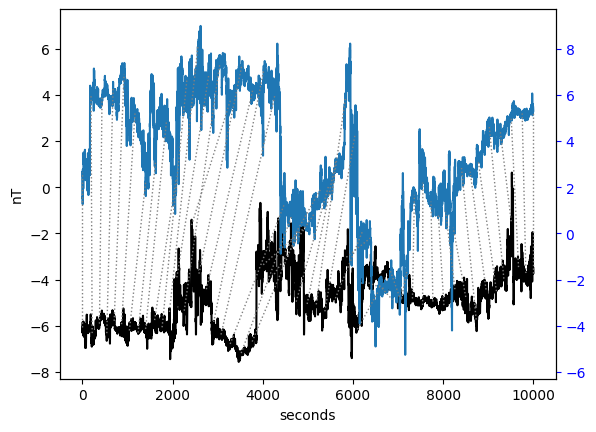

In [21]:
template1 = template[1].iloc[::11]
template1 = template1.reset_index(drop=True)

coord1 = dtw(query[0].iloc[:10000], template1.iloc[:10000], keep_internals=True, 
    step_pattern=rabinerJuangStepPattern(6, "c")).plot(type="twoway",offset=-2, xlab="seconds", ylab='nT')
plt.show()

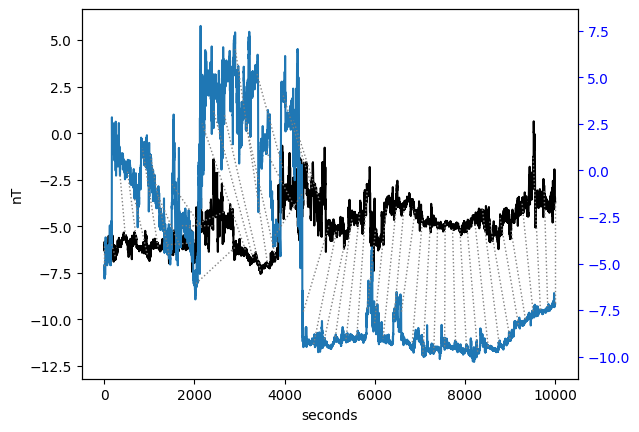

In [22]:
template2 = template[2].iloc[::11]
template2 = template2.reset_index(drop=True)

coord2 = dtw(query[0].iloc[:10000], template2.iloc[:10000], keep_internals=True, 
    step_pattern=rabinerJuangStepPattern(6, "c")).plot(type="twoway",offset=-2, xlab="seconds", ylab="nT")
plt.show()

DTW for each component of the Magnetic field vector (which is mapped to GSE cartesian coordinates)

Step 3: Select time series from the Wind ion parameters (density, n(D(t)); temperature, w(D(t)); velocity, v(D(t))) for time periods where Pτ( BW(D(t)), BD(t) ) is near unity; Train DSCOVR to produce these parameters

- clean data + resample

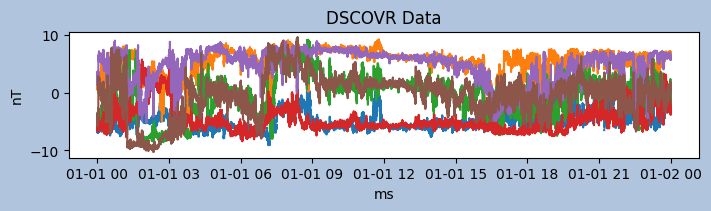

In [34]:
# DSCOVR
x_d = cdf_dscovr['Epoch1'][...]
y_d = cdf_dscovr['B1GSE'][...]
y_df_d = pd.DataFrame(y_d)
y_df_filtered_d = y_df_d[(y_df_d > -2147483648)] 

# Wind
x_w = cdf_wind['Epoch'][...]
y_w = cdf_wind['BGSE'][...]
y_df_w = pd.DataFrame(y_w)
y_df_filtered_w = y_df_w[(y_df_w > -2147483648)] 

# Downsample Wind
x_w_down = pd.DataFrame(x_w)
y_w_down = pd.DataFrame(y_w)
x_w_down = x_w_down.iloc[::11]
x_w_down = x_w_down.reset_index(drop=True)
y_w_down0 = y_w_down[0].iloc[::11]
y_w_down1 = y_w_down[1].iloc[::11]
y_w_down2 = y_w_down[2].iloc[::11]
y_w_down0 = y_w_down0.reset_index(drop=True)
y_w_down1 = y_w_down1.reset_index(drop=True)
y_w_down2 = y_w_down2.reset_index(drop=True)

fig, ax = plt.subplots(figsize=(7,2), constrained_layout=True)
ax.plot(x_d, y_df_filtered_d)
ax.plot(x_w_down, y_w_down0)
ax.plot(x_w_down, y_w_down1)
ax.plot(x_w_down, y_w_down2)

ax.set_xlabel('ms')
ax.set_ylabel('nT')
plt.title('DSCOVR Data')
fig.set_facecolor('lightsteelblue')

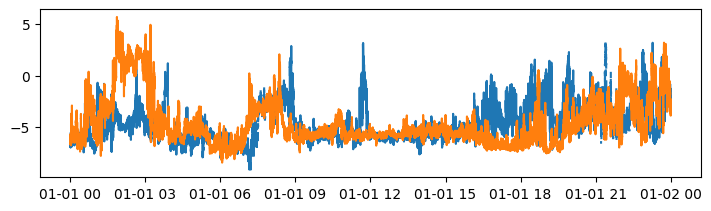

In [31]:
fig0, ax = plt.subplots(figsize=(7,2), constrained_layout=True)
ax.plot(x_d, y_df_filtered_d[0])
ax.plot(x_w_down, y_w_down0)

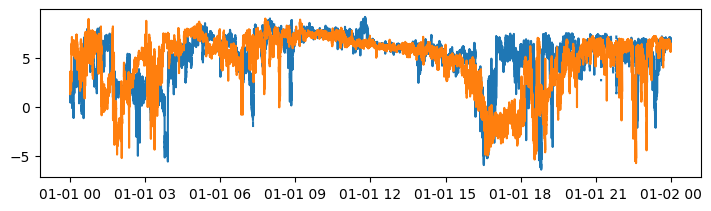

In [32]:
fig1, ax = plt.subplots(figsize=(7,2), constrained_layout=True)
ax.plot(x_d, y_df_filtered_d[1])
ax.plot(x_w_down, y_w_down1)

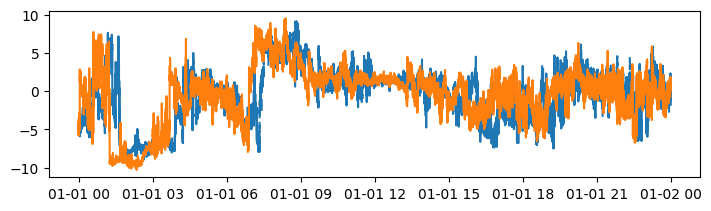

In [33]:
fig2, ax = plt.subplots(figsize=(7,2), constrained_layout=True)
ax.plot(x_d, y_df_filtered_d[2])
ax.plot(x_w_down, y_w_down2)

Get Wind Ion Data

location: https://cdaweb.gsfc.nasa.gov/pub/data/wind/swe/swe_h1/2022/

In [36]:
import wget
url = 'https://cdaweb.gsfc.nasa.gov/pub/data/wind/swe/swe_h1/2022/wi_h1_swe_20220101_v01.cdf'
filename = wget.download(url)	

In [62]:
cdf_wind_ion = pycdf.CDF('datasets/wi_h1_swe_20220101_v01.cdf')
print('These are the variables within this file:\n')
print(cdf_wind_ion)

These are the variables within this file:

Alpha_Na_nonlin: CDF_FLOAT [579]
Alpha_VX_nonlin: CDF_FLOAT [579]
Alpha_VY_nonlin: CDF_FLOAT [579]
Alpha_VZ_nonlin: CDF_FLOAT [579]
Alpha_V_nonlin: CDF_FLOAT [579]
Alpha_W_nonlin: CDF_FLOAT [579]
Alpha_Wpar_nonlin: CDF_FLOAT [579]
Alpha_Wperp_nonlin: CDF_FLOAT [579]
Alpha_sigmaNa_nonlin: CDF_FLOAT [579]
Alpha_sigmaVX_nonlin: CDF_FLOAT [579]
Alpha_sigmaVY_nonlin: CDF_FLOAT [579]
Alpha_sigmaVZ_nonlin: CDF_FLOAT [579]
Alpha_sigmaV_nonlin: CDF_FLOAT [579]
Alpha_sigmaW_nonlin: CDF_FLOAT [579]
Alpha_sigmaWpar_nonlin: CDF_FLOAT [579]
Alpha_sigmaWperp_nonlin: CDF_FLOAT [579]
Ang_dev: CDF_FLOAT [579]
BX: CDF_FLOAT [579]
BY: CDF_FLOAT [579]
BZ: CDF_FLOAT [579]
ChisQ_DOF_nonlin: CDF_FLOAT [579]
EW_flowangle: CDF_FLOAT [579]
Epoch: CDF_EPOCH [579]
NS_flowangle: CDF_FLOAT [579]
Peak_doy: CDF_DOUBLE [579]
Proton_Np_moment: CDF_FLOAT [579]
Proton_Np_nonlin: CDF_FLOAT [579]
Proton_VX_moment: CDF_FLOAT [579]
Proton_VX_nonlin: CDF_FLOAT [579]
Proton_VY_moment: 

In [38]:
print('This is the global metadata record of the file:\n')
print(cdf_wind_ion.attrs)

This is the global metadata record of the file:

ADID_ref: 
Acknowledgement: 
Data_type: VS>Validated Summary Data [CDF_CHAR]
Data_version: 01 [CDF_CHAR]
Descriptor: SWE>Solar Wind Experiment [CDF_CHAR]
Discipline: Space Physics>Magnetospheric Science [CDF_CHAR]
            Space Physics>Interplanetary Studies [CDF_CHAR]
File_naming_convention: source_datatype_descriptor [CDF_CHAR]
Generated_by: Michael L. Stevens (mstevens@cfa.harvard.edu) [CDF_CHAR]
Generation_date: Fri Feb 18 15:14:53 2022 [CDF_CHAR]
HTTP_LINK: 
Instrument_type: Ephemeris [CDF_CHAR]
                 Plasma and Solar Wind [CDF_CHAR]
                 Magnetic Fields (space) [CDF_CHAR]
LINK_TEXT: 
LINK_TITLE: 
Logical_file_id: wi_h1_swe_20220101_v01 [CDF_CHAR]
Logical_source: wind_vs_swe [CDF_CHAR]
Logical_source_description: Solar wind proton and alpha parameters, including anisotropic temperatures, derived by non-linear fitting of the measurements and with moment techniques. [CDF_CHAR]
MODS: data analysis package rev

Targets: Vx Vy Vz Np and W (estimate Vx, Np first)

- use nonlinear since data was analyzed with curve fitting

Density: 
- density, n(D(t)), Proton_Np_nonlin

Temperature: 
- temperature, w(D(t))

Velocity: 
- velocity, v(D(t)), Proton_VX_nonlin, Proton_VY_nonlin, Proton_VX_nonlin

In [44]:
print(cdf_wind_ion['Proton_Np_nonlin'].attrs)
print("\n")
print(cdf_wind_ion['Proton_VX_nonlin'].attrs)
print("\n")
print(cdf_wind_ion['Proton_VY_nonlin'].attrs)
print("\n")
print(cdf_wind_ion['Proton_VZ_nonlin'].attrs)
print("\n")
print(cdf_wind_ion['Proton_W_nonlin'].attrs)



CATDESC: Proton number density Np (n/cc) from non-linear analysis (linear scale) [CDF_CHAR]
DELTA_MINUS_VAR: Proton_sigmaNp_nonlin [CDF_CHAR]
DELTA_PLUS_VAR: Proton_sigmaNp_nonlin [CDF_CHAR]
DEPEND_0: Epoch [CDF_CHAR]
DISPLAY_TYPE: time_series [CDF_CHAR]
FIELDNAM: Proton number density Np (n/cc) from non-linear analysis (linear scale) [CDF_CHAR]
FILLVAL: -1e+31 [CDF_FLOAT]
FORMAT: E12.2 [CDF_CHAR]
LABLAXIS: P+ density [CDF_CHAR]
SCALETYP: linear [CDF_CHAR]
UNITS: cm^{-3} [CDF_CHAR]
VALIDMAX: 1000.0 [CDF_FLOAT]
VALIDMIN: 0.0 [CDF_FLOAT]
VAR_NOTES: Obtained from non-linear fitting to the ion current distribution function (CDF). [CDF_CHAR]
VAR_TYPE: data [CDF_CHAR]


CATDESC: X_GSE component of the proton vector velocity [km/s], from non-linear analysis [CDF_CHAR]
DELTA_MINUS_VAR: Proton_sigmaVX_nonlin [CDF_CHAR]
DELTA_PLUS_VAR: Proton_sigmaVX_nonlin [CDF_CHAR]
DEPEND_0: Epoch [CDF_CHAR]
DISPLAY_TYPE: time_series [CDF_CHAR]
FIELDNAM: Proton bulk Vx, nonlin [CDF_CHAR]
FILLVAL: -1e+31 [CDF_

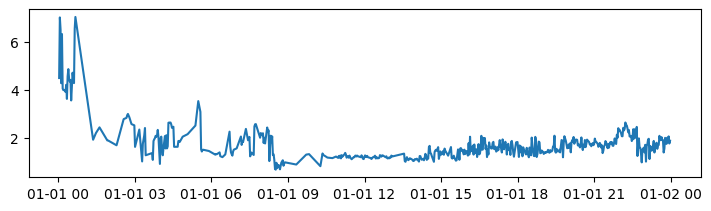

In [47]:
fig, ax = plt.subplots(figsize=(7,2), constrained_layout=True)
y = cdf_wind_ion['Proton_Np_nonlin'][...]
x = cdf_wind_ion['Epoch'][...]
ax.plot(x, y)

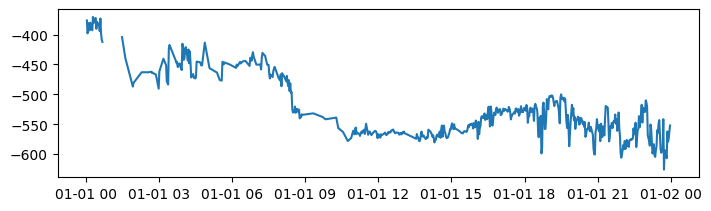

In [55]:
x = cdf_wind_ion['Epoch'][...]
y = cdf_wind_ion['Proton_VX_nonlin'][...]
y = pd.DataFrame(y)
y_ = y[(y < 10000)] 
fig, ax = plt.subplots(figsize=(7,2), constrained_layout=True)
ax.plot(x, y_)

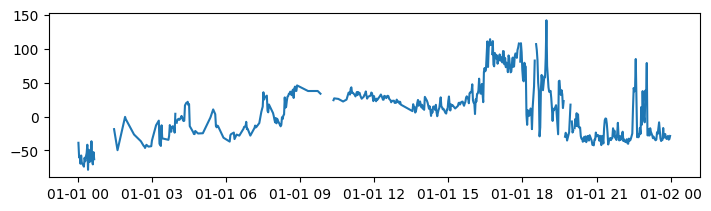

In [56]:
x = cdf_wind_ion['Epoch'][...]
y = cdf_wind_ion['Proton_VY_nonlin'][...]
y = pd.DataFrame(y)
y_ = y[(y < 10000)] 
fig, ax = plt.subplots(figsize=(7,2), constrained_layout=True)
ax.plot(x, y_)

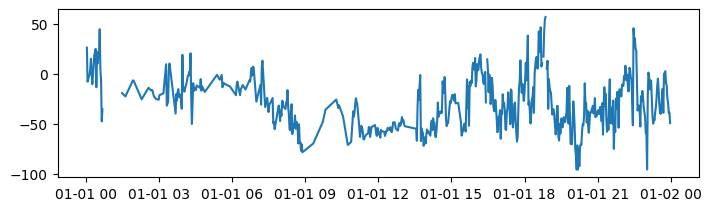

In [57]:
x = cdf_wind_ion['Epoch'][...]
y = cdf_wind_ion['Proton_VZ_nonlin'][...]
y = pd.DataFrame(y)
y_ = y[(y < 10000)] 
fig, ax = plt.subplots(figsize=(7,2), constrained_layout=True)
ax.plot(x, y_)

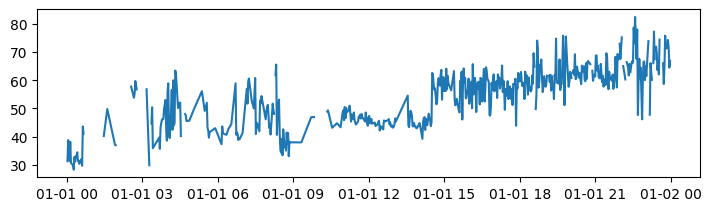

In [58]:
x = cdf_wind_ion['Epoch'][...]
y = cdf_wind_ion['Proton_W_nonlin'][...]
y = pd.DataFrame(y)
y_ = y[(y < 10000)] 
fig, ax = plt.subplots(figsize=(7,2), constrained_layout=True)
ax.plot(x, y_)

Step 4: Prepare representations of the DSCOVR spectra (current vs. voltage) at the corresponding set of time points

(approx 01-01 11 to 01-01 13)

Location: https://www.ngdc.noaa.gov/dscovr/portal/index.html#/

Paper: https://www.aanda.org/articles/aa/full_html/2021/06/aa41063-21/aa41063-21.html

In [65]:
f = open("datasets/archive-item-472559/oe_fc0_dscovr_s20220101000000_e20220101235959_p20220102021103_pub.nc.gz", "r")
print(f.read())

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 1: invalid start byte

Step 5: Train a neural network to predict the Wind n(D(t)), w(D(t)), and v(D(t) values from the DSCOVR data